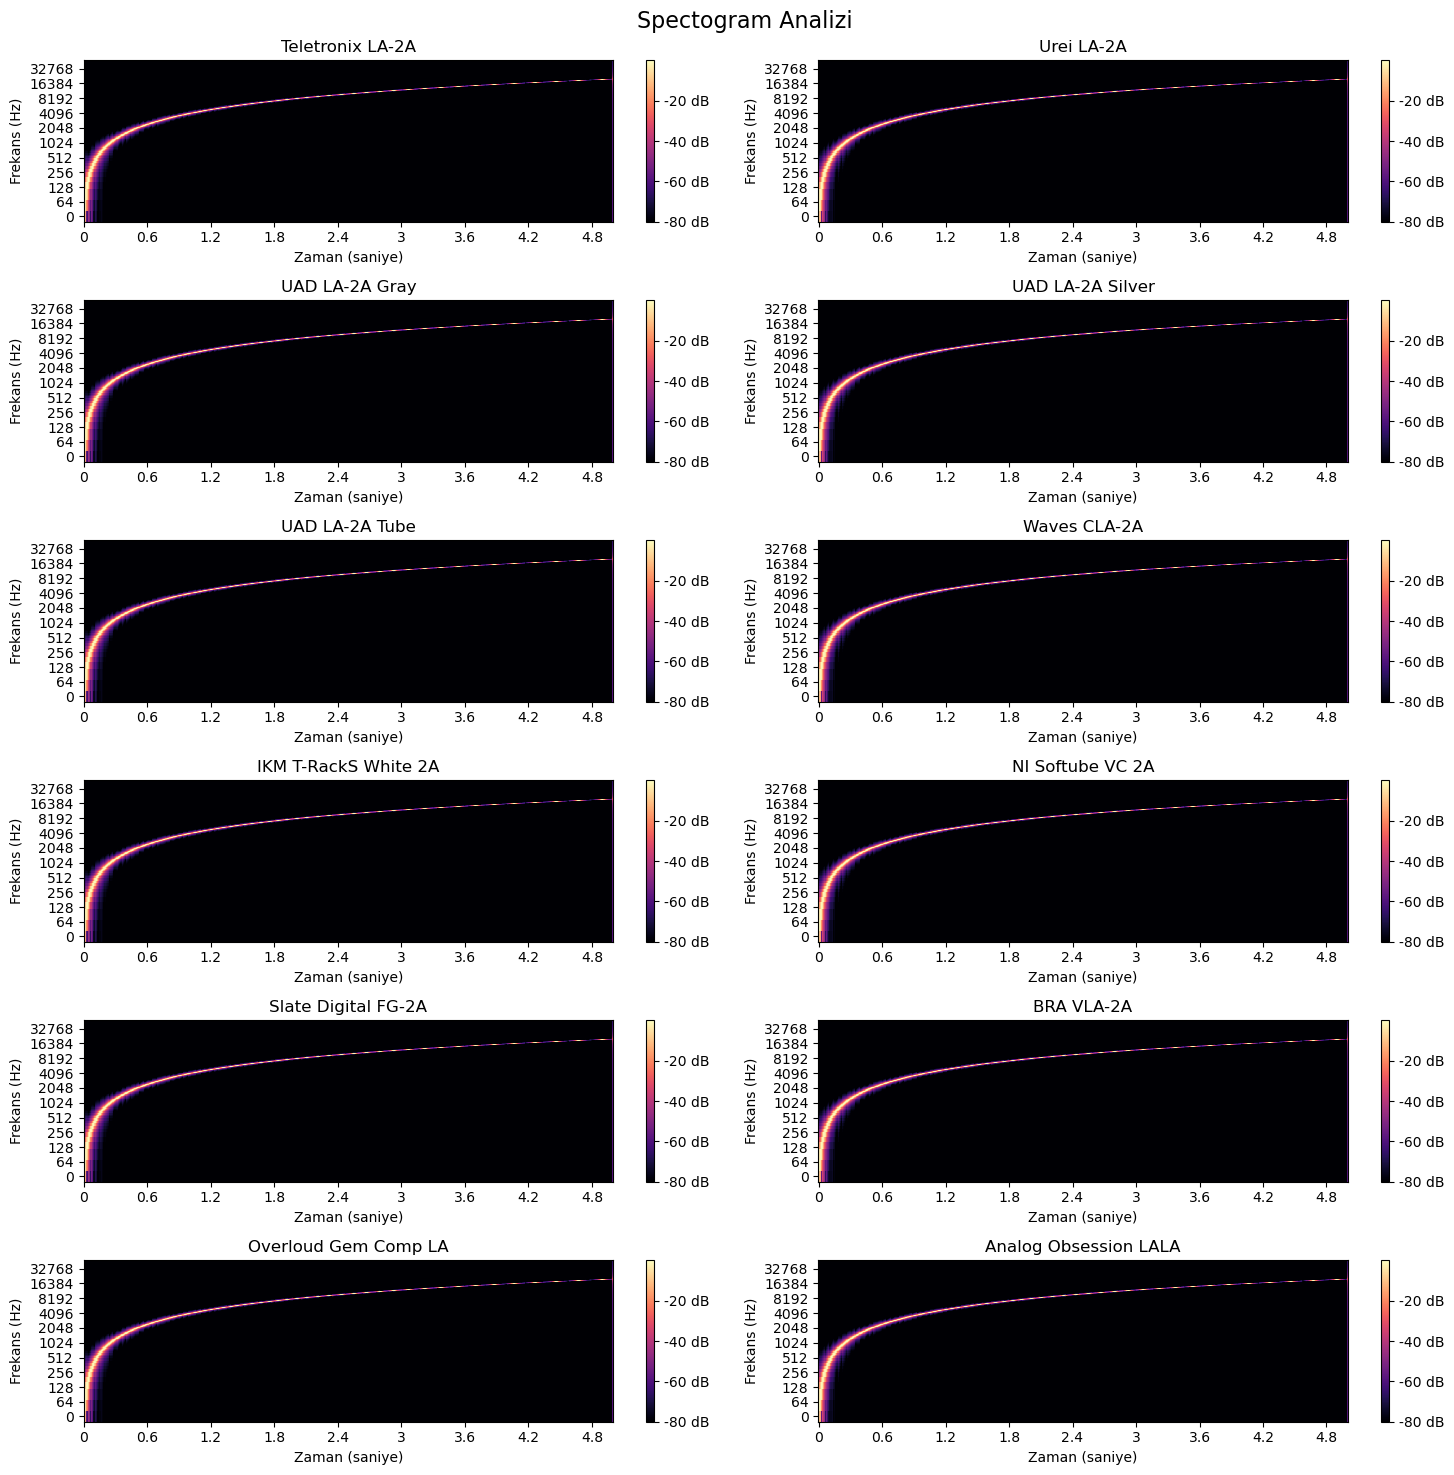

In [4]:
# Bir spektrogram, ses sinyalinin zamanla frekans içeriğini gösteren bir grafiktir.
# Her bir frekansın o anki enerji seviyesini (güç) temsil eder. Daha parlak renkler daha yüksek enerji seviyelerini gösterir.

# Frekans cevabı, distorsiyon ve spektrogram analizi için linear sweep sinüs dalgası kullanılmalıdır.
# Bu sinyal, LA-2A donanımının ve yazılımlarının tepki davranışlarını kapsamlı ve net bir şekilde görmeyi sağlar.
    
# Librosa sisteminin aktarılması
import matplotlib.pyplot as plt # Grafik ve görselleştirme işlemleri için Matplotlib kütüphanesini yükler.
import numpy as np # Bilimsel hesaplama ve dizi işlemleri için NumPy kütüphanesini yükler.
import librosa # Ses işleme ve analiz için Librosa kütüphanesini yükler.
import librosa.display # Librosa’nın ses grafikleri çizme fonksiyonlarını yükler.
import pyloudnorm as pyln  # LUFS analizini yapar.
import IPython.display as ipd # Ses dosyalarını Jupyter'da çalmak için gerekli IPython fonksiyonlarını yükler.
from IPython.display import Audio, display  # Ses dosyalarını Jupyter hücresinde oynatmaya olanak tanır.

# Ses dosyalarının yollarını bir listeye ekleme
audio_files = [
    "/Users/nazimerensahin/Desktop/linear_sweep_sine_5s_96khz_32bit.wav", 
    "/Users/nazimerensahin/Desktop/linear_sweep_sine_5s_96khz_32bit.wav",     
    "/Users/nazimerensahin/Desktop/linear_sweep_sine_5s_96khz_32bit.wav",
    "/Users/nazimerensahin/Desktop/linear_sweep_sine_5s_96khz_32bit.wav",
    "/Users/nazimerensahin/Desktop/linear_sweep_sine_5s_96khz_32bit.wav", 
    "/Users/nazimerensahin/Desktop/linear_sweep_sine_5s_96khz_32bit.wav",     
    "/Users/nazimerensahin/Desktop/linear_sweep_sine_5s_96khz_32bit.wav",
    "/Users/nazimerensahin/Desktop/linear_sweep_sine_5s_96khz_32bit.wav",
    "/Users/nazimerensahin/Desktop/linear_sweep_sine_5s_96khz_32bit.wav", 
    "/Users/nazimerensahin/Desktop/linear_sweep_sine_5s_96khz_32bit.wav",     
    "/Users/nazimerensahin/Desktop/linear_sweep_sine_5s_96khz_32bit.wav",
    "/Users/nazimerensahin/Desktop/linear_sweep_sine_5s_96khz_32bit.wav",
]

# Her dosya için açıklayıcı isimler ekleme
audio_labels = [
    "Teletronix LA-2A",
    "Urei LA-2A",
    "UAD LA-2A Gray",
    "UAD LA-2A Silver",
    "UAD LA-2A Tube",
    "Waves CLA-2A",
    "IKM T-RackS White 2A",
    "NI Softube VC 2A",
    "Slate Digital FG-2A",
    "BRA VLA-2A",
    "Overloud Gem Comp LA",
    "Analog Obsession LALA",
]

# Grafik ayarları
plt.figure(figsize=(15, 15))
n_fft = 2048  # FFT boyutu
hop_length = 512  # Hop uzunluğu
cmap = 'magma'  # Renk skalası

# Her bir ses dosyası için spektrogram analizi
for i, (file_path, label) in enumerate(zip(audio_files, audio_labels)):
    # Ses dosyasını yükle
    y, sr = librosa.load(file_path, sr=None)
    
    # STFT hesapla ve dB skalasına dönüştür
    D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, window='hann')
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    # Alt grafik (subplot) ekle
    plt.subplot(6, 2, i + 1)
    librosa.display.specshow(S_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap=cmap)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"{label}")
    plt.xlabel("Zaman (saniye)")
    plt.ylabel("Frekans (Hz)")

# Görselleştirme ve genel başlık
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Genel başlık için alan bırak
plt.suptitle("Spectogram Analizi", fontsize=16)
plt.show()
